# Time Series Graphs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Prediction Comparison

Model: LSTM
WQ                                                           Chla
nvar                                                           11
var             ['TB_B2B3B4', 'LH_B3B4B5', 'LH_B7B8AB11', 'B8A...
random_state                                                    1
units                                                          50
best_score                                                0.43353
r2                                                        0.43353
adjusted_r2                                              0.405713
corr_model                                               0.776623
rmse                                                     4.076715
mae                                                      2.614222
smape                                                    0.839924
r2_test                                                 -0.010328
corr_test                                                0.320444
rmse_test                                                2.39642

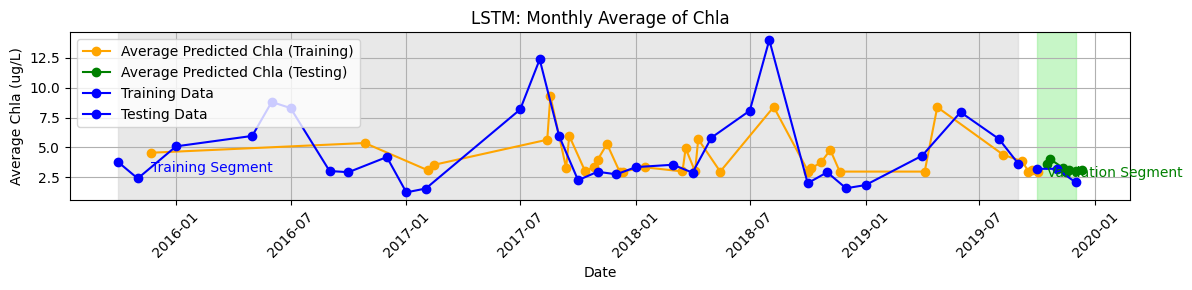

WQ                                                             SS
nvar                                                            6
var             ['Image_Year', 'LH_B7B8AB11', 'NR_B12B4', 'TB_...
random_state                                                    1
units                                                          50
best_score                                               0.295763
r2                                                       0.295763
adjusted_r2                                              0.214505
corr_model                                               0.692914
rmse                                                     2.039988
mae                                                      1.790821
smape                                                    0.574013
r2_test                                                 -0.271663
corr_test                                               -0.223769
rmse_test                                                 2.36408
mae_test  

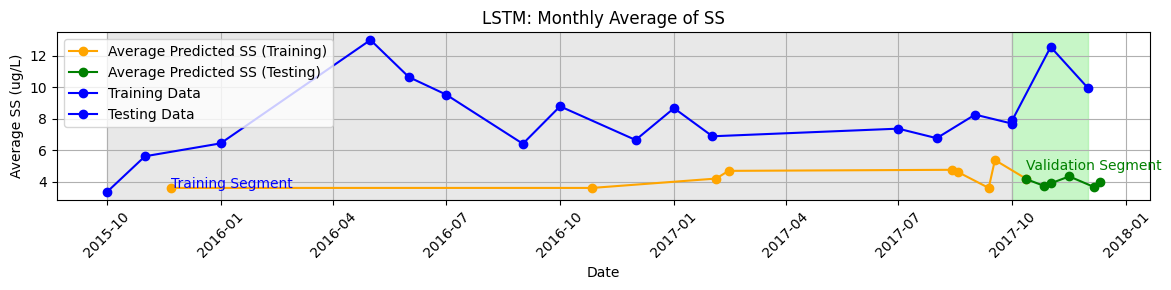

WQ                                                            Tur
nvar                                                           11
var             ['LH_B4B5B6', 'LH_B5B6B7', 'B5_3', 'B5_2', 'LH...
random_state                                                    1
units                                                          50
best_score                                               0.361044
r2                                                       0.361044
adjusted_r2                                              0.336208
corr_model                                               0.640172
rmse                                                     3.966646
mae                                                      2.718577
smape                                                    0.608254
r2_test                                                  0.219968
corr_test                                                0.676027
rmse_test                                                 1.78345
mae_test  

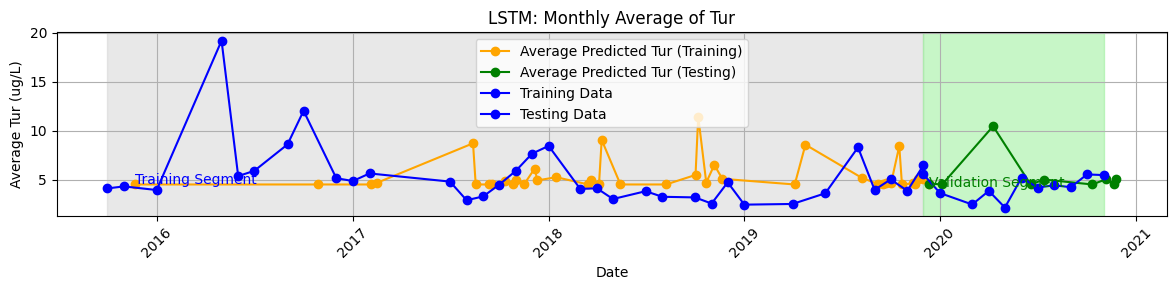

Model: ANN
WQ                                                           Chla
nvar                                                            9
var             ['TB_B2B3B4', 'LH_B3B4B5', 'LH_B7B8AB11', 'B8A...
random_state                                                    1
best_layer                                                      5
best_alpha                                               0.000001
best_score                                              -0.156779
r2                                                       0.238763
adjusted_r2                                              0.208448
corr_model                                               0.622966
rmse                                                     4.861464
mae                                                      2.671804
smape                                                    0.844137
r2_test                                                  0.143191
corr_test                                                0.283775

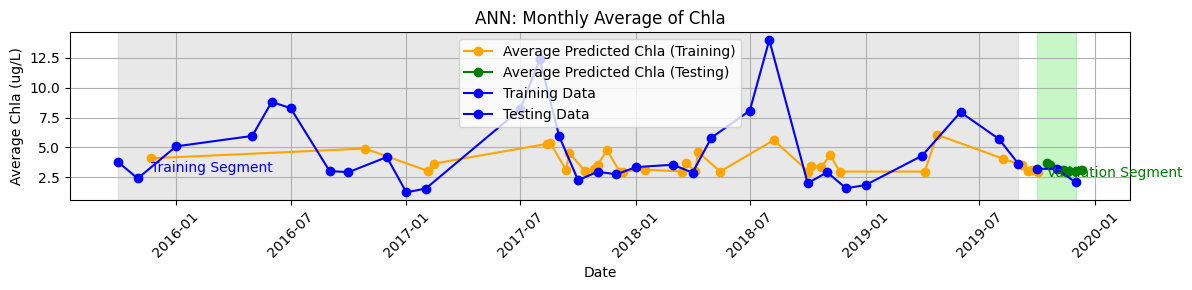

WQ                                                             SS
nvar                                                           12
var             ['Image_Year', 'LH_B7B8AB11', 'NR_B12B4', 'TB_...
random_state                                                    1
best_layer                                                      2
best_alpha                                               0.000001
best_score                                              -1.784366
r2                                                       0.324028
adjusted_r2                                              0.147688
corr_model                                               0.529962
rmse                                                     2.254088
mae                                                      1.981052
smape                                                    0.611786
r2_test                                                 -0.779579
corr_test                                               -0.113794
rmse_test 

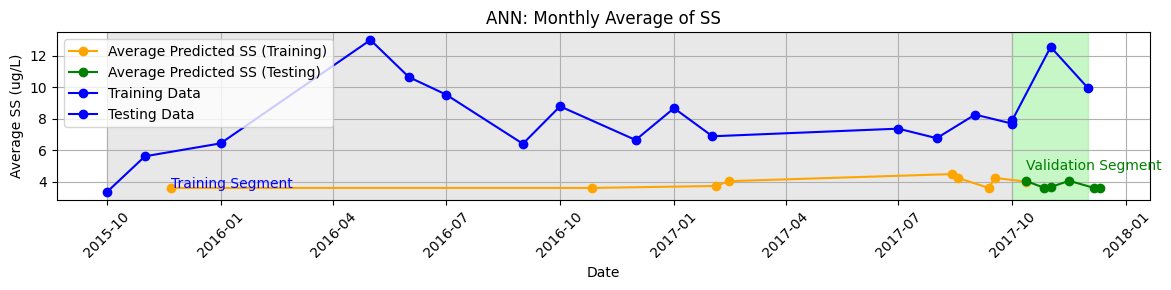

WQ                                                            Tur
nvar                                                            5
var             ['LH_B4B5B6', 'LH_B5B6B7', 'B5_3', 'B5_2', 'LH...
random_state                                                    1
best_layer                                                      6
best_alpha                                               0.000001
best_score                                               0.050966
r2                                                       0.152002
adjusted_r2                                               0.13733
corr_model                                               0.574525
rmse                                                     4.692476
mae                                                      2.835362
smape                                                    0.614442
r2_test                                                  0.275129
corr_test                                                0.587794
rmse_test 

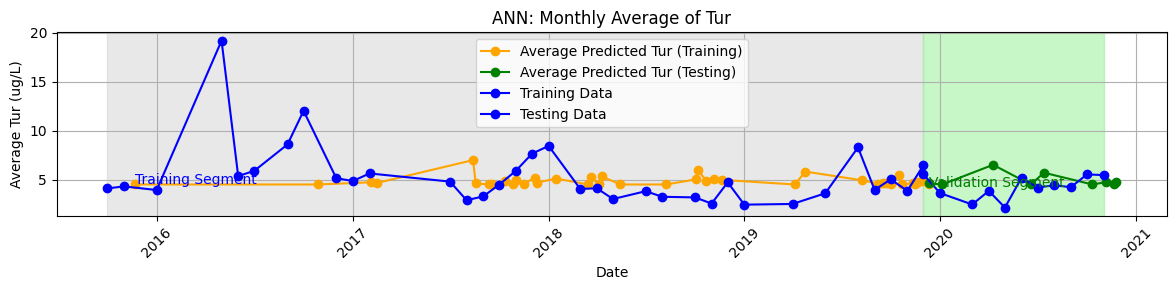

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

def plot_wq_data(wq_name, model):
    # Load the data into a DataFrame
    df = pd.read_csv("data/df_data.csv")
    df = df.rename(columns={'Turbidity NTU': 'Tur', 'Suspended Solids mg_L': 'SS', 'Chlorophyll-a ug_L': "Chla"})

    # Convert the "Image_Date" column to datetime format
    df['Image_date'] = pd.to_datetime(df['Image_date'], format='%Y-%m-%d')
    
    if model == "LSTM":
        model_path = f'data/LSTM_results.csv'
    elif model == "ANN":
        model_path = f'data/ANN/ANN_results.csv'
    elif model == "ARIMA":
        model_path = f'data/ARIMA/ARIMA_results.csv'

    # Load model results data
    df_model_results = pd.read_csv(model_path)
    filtered_df = df_model_results[df_model_results['WQ'] == wq_name]
    lowest_rmse_entry = filtered_df.loc[filtered_df['rmse_test'].idxmin()]
    
    performance_metrics = lowest_rmse_entry.copy().drop(columns=["train_index", "test_index", "Y_train_pred", "Y_test_pred", "Y_train", "Y_test"])
    print(performance_metrics)

    df_model_dates = pd.read_csv('./data/df_data_graphing_filter.csv')

    # Extract training data
    training_indexes = list(map(int, re.findall(r'\d+', lowest_rmse_entry['train_index'])))
    train_dates = pd.to_datetime(df_model_dates.loc[training_indexes[0]:training_indexes[-1], "Date"])
    lower_bound = train_dates[train_dates.size-1]
    df_train = df[df['Image_date'] < lower_bound].copy()
    df_train['YearMonth'] = df_train['Image_date'].dt.to_period('M')

    # Extract testing data
    testing_indexes = list(map(int, re.findall(r'\d+', lowest_rmse_entry['test_index'])))
    test_dates = pd.to_datetime(df_model_dates.loc[testing_indexes[0]:testing_indexes[-1], "Date"])
    upper_bound = test_dates[test_dates.index[test_dates.size-1]]
    df_test = df[(df['Image_date'] >= lower_bound) & (df['Image_date'] < upper_bound)].copy()
    df_test['YearMonth'] = df_test['Image_date'].dt.to_period('M')
    
    monthly_avg_test = df_test.groupby('YearMonth')[wq_name].mean().reset_index()
    monthly_avg_test.columns = ['YearMonth', f'Avg_{wq_name}']
    monthly_avg_test['YearMonth'] = pd.to_datetime(monthly_avg_test['YearMonth'].dt.to_timestamp())

    monthly_avg = df_train.groupby('YearMonth')[wq_name].mean().reset_index()
    monthly_avg.columns = ['YearMonth', f'Avg_{wq_name}']
    monthly_avg['YearMonth'] = pd.to_datetime(monthly_avg['YearMonth'].dt.to_timestamp())

    # Assuming monthly_avg and monthly_avg_test are already prepared
    combined_data = pd.concat([monthly_avg, monthly_avg_test], keys=['Training', 'Testing'])

    # Reset index to access the 'level_0' which indicates if it's training or testing data
    combined_data.reset_index(inplace=True)

    training_indexes = list(map(int, re.findall(r'\d+', lowest_rmse_entry['train_index'])))
    train_dates = pd.to_datetime(df_model_dates.loc[training_indexes[0]:training_indexes[-1], "Date"])
    train_values = df_model_dates.loc[training_indexes[0]:training_indexes[-1], wq_name]

    # Extract predicted values for training
    train_pred_str = lowest_rmse_entry["Y_train_pred"].replace('[', '').replace(']', '').replace('\n', '')
    train_pred_list_str = train_pred_str.split()
    train_pred_values = [float(num_str) for num_str in train_pred_list_str]

    # Create a DataFrame to hold the training data and predictions
    train_data = pd.DataFrame({
        'Date': train_dates,
        wq_name: train_values,
        'Pred_' + wq_name: train_pred_values
    })

    # Convert 'Date' column to datetime format
    train_data['Date'] = pd.to_datetime(train_data['Date'])

    # Calculate average predicted values for each unique date
    avg_pred_values = train_data.groupby('Date')['Pred_' + wq_name].mean().reset_index()

    testing_indexes = list(map(int, re.findall(r'\d+', lowest_rmse_entry['test_index'])))
    test_dates = pd.to_datetime(df_model_dates.loc[testing_indexes[0]:testing_indexes[-1], "Date"])
    test_values = df_model_dates.loc[testing_indexes[0]:testing_indexes[-1], wq_name]

    # Extract predicted values for testing
    test_pred_str = lowest_rmse_entry["Y_test_pred"].replace('[', '').replace(']', '').replace('\n', '')
    test_pred_list_str = test_pred_str.split()
    test_pred_values = [float(num_str) for num_str in test_pred_list_str]

    test_data = pd.DataFrame({
        'Date': test_dates,
        wq_name: test_values,
        'Pred_' + wq_name: test_pred_values
    })

    # Convert 'Date' column to datetime format
    test_data['Date'] = pd.to_datetime(test_data['Date'])

    # Calculate average predicted values for each unique date
    avg_test_pred_values = test_data.groupby('Date')['Pred_' + wq_name].mean().reset_index()

    # Plotting
    plt.figure(figsize=(12, 3))

    # Plot average predicted values for training
    plt.plot(avg_pred_values['Date'], avg_pred_values['Pred_' + wq_name],
             label=f'Average Predicted {wq_name} (Training)', marker='o', linestyle='-', color='orange')

    # Plot average predicted values for testing
    plt.plot(avg_test_pred_values['Date'], avg_test_pred_values['Pred_' + wq_name],
             label=f'Average Predicted {wq_name} (Testing)', marker='o', linestyle='-', color='green')

    # Plot training data
    plt.plot(combined_data.loc[combined_data['level_0'] == 'Training', 'YearMonth'],
             combined_data.loc[combined_data['level_0'] == 'Training', f'Avg_{wq_name}'],
             marker='o', linestyle='-', color='b', label='Training Data')

    # Plot testing data
    plt.plot(combined_data.loc[combined_data['level_0'] == 'Testing', 'YearMonth'],
             combined_data.loc[combined_data['level_0'] == 'Testing', f'Avg_{wq_name}'],
             marker='o', linestyle='-', color='b', label='Testing Data')

    plt.xlabel('Date')
    plt.ylabel(f'Average {wq_name} (ug/L)')
    plt.title(f'{model}: Monthly Average of {wq_name}')
    plt.grid(True)
    plt.xticks(rotation=45)

    # Set different background colors for training and testing data
    plt.axvspan(combined_data.loc[combined_data['level_0'] == 'Training', 'YearMonth'].min(),
                combined_data.loc[combined_data['level_0'] == 'Training', 'YearMonth'].max(),
                color='lightgray', alpha=0.5)

    plt.axvspan(combined_data.loc[combined_data['level_0'] == 'Testing', 'YearMonth'].min(),
                combined_data.loc[combined_data['level_0'] == 'Testing', 'YearMonth'].max(),
                color='lightgreen', alpha=0.5)

    plt.text(train_data['Date'].iloc[0], train_data[wq_name].mean(), 'Training Segment', fontsize=10, color='blue')
    plt.text(test_data['Date'].iloc[0], test_data[wq_name].mean(), 'Validation Segment', fontsize=10, color='green')
    
    plt.legend(loc='lower center', fancybox=True, shadow=True, ncol=1)
    
    plt.legend()
    plt.tight_layout()
    plt.show()
    

# Example usage:
model = ["LSTM", "ANN"]
wq = ["Chla", "SS", "Tur"]

for m in model:
    print(f"Model: {m}")
    for wq_name in wq:
        plot_wq_data(wq_name, m)